In [1]:
from google.colab import drive
drive.mount('/content/drive')
txt_file_path = "/content/drive/MyDrive/data/*"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install keras_ocr
! pip install pytesseract
! pip install tesseract-ocr
! pip install install libtesseract-dev
! pip install grep pytesseract
! pip instal tesseract
! pip install --ignore-installed Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-l0z1voav/tesseract-ocr_d02f3482c5514bd3bf1331e974ce7992/setup.py'"'"'; __file__='"'"'/tmp/pip-install-l0z1voav/tesseract-ocr_d02f3482c5514bd3bf1331e974ce7992/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code 

In [55]:
import matplotlib.pyplot as plt
import keras_ocr
import pytesseract

from PIL         import Image
from pytesseract import Output

2022-06-16 12:17:31.655001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yhy/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-16 12:17:31.655111: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 구현하고자 하는 서비스

## 1. 서비스의 목적 및 내용
<hr/>

<p style= "font-size:15px; line-height:24px;">요즘 운동에 대한 관심이 늘어나면서, 헬스 또는 다이어트 관련 어플이 많이 출시되었는데, 
하루 섭취 영양소를 합산할 때, 상품을 검색해서 섭취 영양소를 확인한다.
그러나, 반영되지 못한 상품들도 많으며, 일일이 직접 입력해야하는 불편함이 있으므로 이를 해소하기 위해 사진을 찍으면 자동으로 텍스트로 변환하여 영양정보를 기입하는 프로그램을 만들고자 한다.</p>

<img src = "img/사업내용.png" style = "float:left;">

<div style = "height: 50px;"></div>

## 2. 평가 기준
<hr/>

<ul style = "font-size:15px;">
	<li style = "margin-bottom:14px;">숫자와 기호를 잘 분리하여 인식했는가 (%, g 구분)</li>
	<li style = "margin-bottom:14px;">숫자 0과 영어문자 o를 잘 구분하였는가</li>
    <li style = "margin-bottom:14px;">한국어 인식이 가능한가 (부가점수)</li>
</ul>

<div style = "height: 50px;"></div>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : keras-ocr 적용하기

In [3]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/yhy/.keras-ocr/craft_mlt_25k.h5


2022-06-16 10:31:23.279258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 10:31:23.280276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yhy/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-16 10:31:23.280474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yhy/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-16 10:31:23.280575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcu

Looking for /home/yhy/.keras-ocr/crnn_kurapan.h5


In [ ]:
# 이미지 로드
data_image_path = [
  '/content/drive/MyDrive/Colab Notebooks/ex12/data/data01.jpg',
  '/content/drive/MyDrive/Colab Notebooks/ex12/data/data02.jpg',
  '/content/drive/MyDrive/Colab Notebooks/ex12/data/validation01.jpg',
  '/content/drive/MyDrive/Colab Notebooks/ex12/data/validation02.jpg',
  
]
data_images = [ keras_ocr.tools.read(i) for i in data_image_path]
data_prediction_groups = [pipeline.recognize([i]) for i in data_image_path]

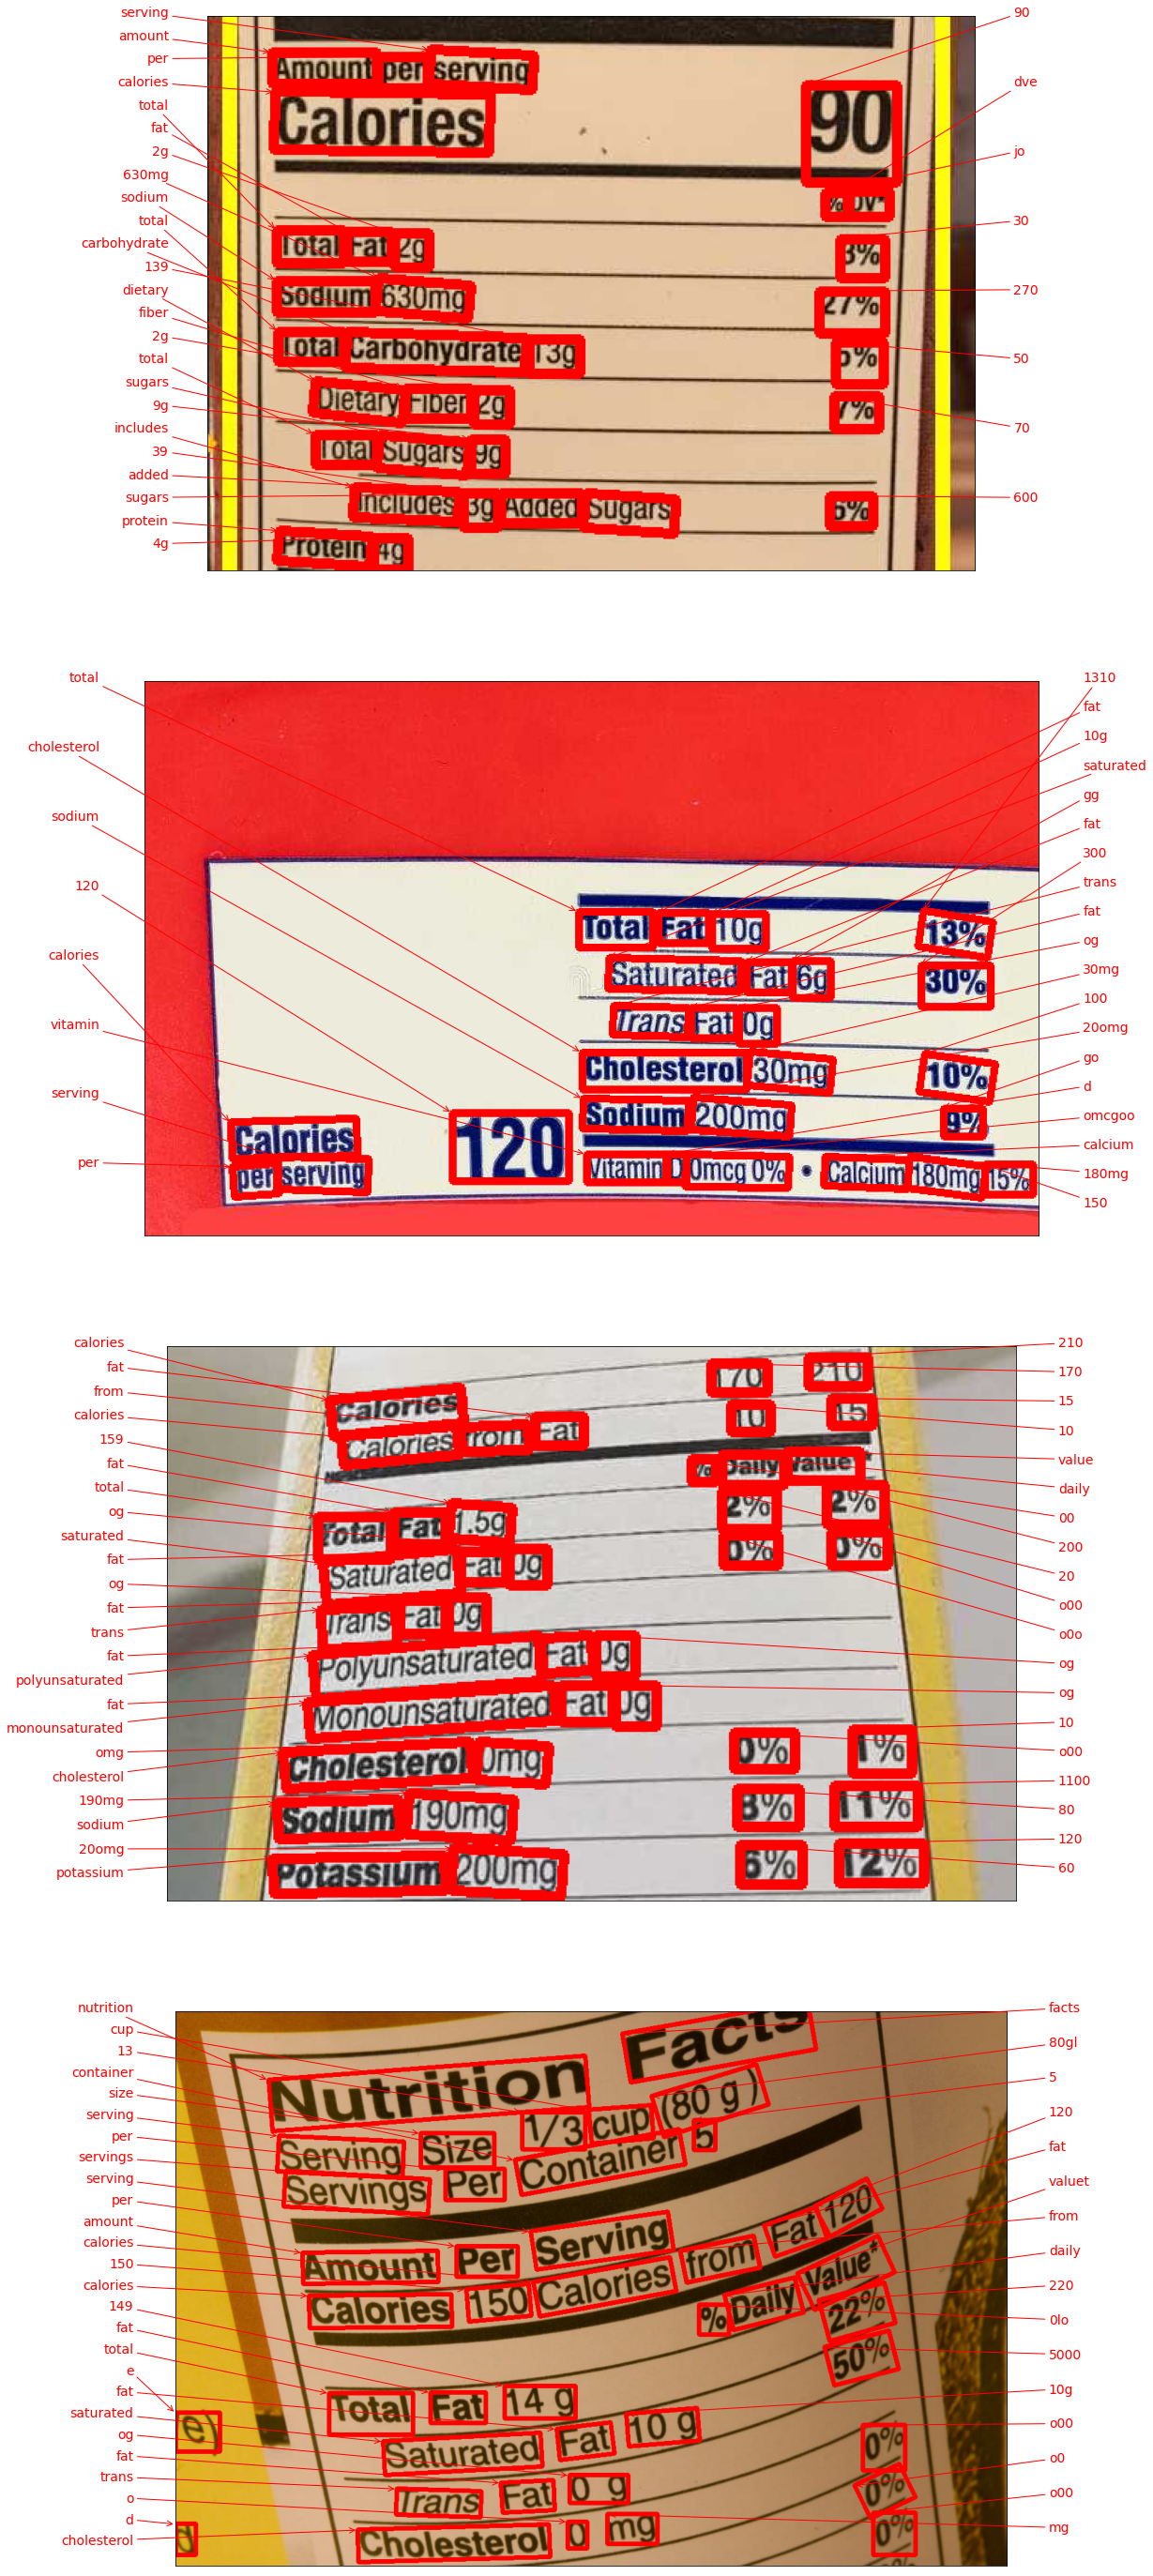

In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(data_images), figsize=(30, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image = data_images[idx], 
                                    predictions=data_prediction_groups[idx][0], ax = ax)


<p style= "font-size:15px; line-height:24px;">텍스트를 출력해본 결과, 글자로 인식되는 영역과 영어 텍스트는 정확하게 잘 나왔으나, 영양 정보에서 중요한 g(그램), % 기호를 잘 인식하지 못하는 치명적인 문제가 발생하였다. 출시하고자 하는 서비스를 고려했을 때 keras ocr은 %와 g같은 문자를 좀 더 잘 인식 할 수 있도록 보완이 필요해보인다. <br/>
또한 한국어로는 따로 학습된 모델이 없으므로, 서비스를 출시함에 있어 아쉬운 점이 있다.</p>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : Tesseract

## 1. Tesseract 파라미터 설명
<hr/>

In [73]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

<div style = "height: 50px;"></div>

## 2. 함수
<hr/>

In [74]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [75]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

<div style = "height: 50px;"></div>

## 3. 모델 실행
<hr/>

### data01

<img src = "data2/data01.jpg" style = "float:left;">

<div style = "height: 25px;"></div>

In [76]:
work_dir = 'data2/cropped_data01'
img_file_path = 'data2/data01.jpg

In [77]:
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

data2/cropped_data01/0000.png
data2/cropped_data01/0001.png
data2/cropped_data01/0002.png
data2/cropped_data01/0003.png
data2/cropped_data01/0004.png
data2/cropped_data01/0005.png
data2/cropped_data01/0006.png
data2/cropped_data01/0007.png
data2/cropped_data01/0008.png
data2/cropped_data01/0009.png
data2/cropped_data01/0010.png
data2/cropped_data01/0011.png
data2/cropped_data01/0012.png
data2/cropped_data01/0013.png
data2/cropped_data01/0014.png
data2/cropped_data01/0015.png
data2/cropped_data01/0016.png
data2/cropped_data01/0017.png
data2/cropped_data01/0018.png
data2/cropped_data01/0019.png
data2/cropped_data01/0020.png
data2/cropped_data01/0021.png
data2/cropped_data01/0022.png
data2/cropped_data01/0023.png
data2/cropped_data01/0024.png
data2/cropped_data01/0025.png
data2/cropped_data01/0026.png
data2/cropped_data01/0027.png
data2/cropped_data01/0028.png
data2/cropped_data01/0029.png
data2/cropped_data01/0030.png
data2/cropped_data01/0031.png


In [78]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Amount

per

serving

Calories -

Of)

% DV


Total Fat

20

3%

Sodium

630mg

21%

Total

Carbohydrate

139

5%

Di

etary

Finer

20

7%

Total

ougars

Ig

includes

3g

Added

sugars

6%

Protein

4g

Done


<div style = "height: 50px;"></div>

### data02

In [79]:
work_dir = 'data2/cropped_data02'
img_file_path = 'data2/data02.jpg'

In [80]:
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

data2/cropped_data02/0000.png
data2/cropped_data02/0001.png
data2/cropped_data02/0002.png
data2/cropped_data02/0003.png
data2/cropped_data02/0004.png
data2/cropped_data02/0005.png
data2/cropped_data02/0006.png
data2/cropped_data02/0007.png
data2/cropped_data02/0008.png
data2/cropped_data02/0009.png
data2/cropped_data02/0010.png
data2/cropped_data02/0011.png
data2/cropped_data02/0012.png
data2/cropped_data02/0013.png
data2/cropped_data02/0014.png
data2/cropped_data02/0015.png
data2/cropped_data02/0016.png
data2/cropped_data02/0017.png
data2/cropped_data02/0018.png
data2/cropped_data02/0019.png
data2/cropped_data02/0020.png
data2/cropped_data02/0021.png
data2/cropped_data02/0022.png
data2/cropped_data02/0023.png
data2/cropped_data02/0024.png
data2/cropped_data02/0025.png
data2/cropped_data02/0026.png
data2/cropped_data02/0027.png
data2/cropped_data02/0028.png
data2/cropped_data02/0029.png
data2/cropped_data02/0030.png
data2/cropped_data02/0031.png
data2/cropped_data02/0032.png
data2/crop

In [81]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

} Soi

}

i

i


| per serving i4.U

‘I

Total Fat

10g

13%

Saturated

Fat

6g

30%

rans

Fat

Og

Ch

olesterol

30mg


a

Sodium

200mg



revpabd

1

A)

Vitamin D

Omcg

(}%

¢

Calcium

180mg

15%

Done


<div style = "height: 50px;"></div>

### validation 01

In [82]:
work_dir = 'data2/cropped_validation01'
img_file_path = 'data2/validation01.jpg'

In [83]:
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

data2/cropped_validation01/0000.png
data2/cropped_validation01/0001.png
data2/cropped_validation01/0002.png
data2/cropped_validation01/0003.png
data2/cropped_validation01/0004.png
data2/cropped_validation01/0005.png
data2/cropped_validation01/0006.png
data2/cropped_validation01/0007.png
data2/cropped_validation01/0008.png
data2/cropped_validation01/0009.png
data2/cropped_validation01/0010.png
data2/cropped_validation01/0011.png
data2/cropped_validation01/0012.png
data2/cropped_validation01/0013.png
data2/cropped_validation01/0014.png
data2/cropped_validation01/0015.png
data2/cropped_validation01/0016.png
data2/cropped_validation01/0017.png
data2/cropped_validation01/0018.png
data2/cropped_validation01/0019.png
data2/cropped_validation01/0020.png
data2/cropped_validation01/0021.png
data2/cropped_validation01/0022.png
data2/cropped_validation01/0023.png
data2/cropped_validation01/0024.png
data2/cropped_validation01/0025.png
data2/cropped_validation01/0026.png
data2/cropped_validation01/0

In [84]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


ee

7

ies

Calor

SS ae

7 |


Calories tro

mrka

L

—————_

% Daily

Value*™"

B%,

yotal Fat 1.59"

Saturated

ml

Og

Trans Fat

Og


Og

Monounsaturated

Fat

Ug

Choleste

rol

Umg

Sodium

190mg

Potassium

200mg

0%

8%

6%

;

Done


<div style = "height: 50px;"></div>

### validation 02

In [85]:
work_dir = 'data2/cropped_validation02'
img_file_path = 'data2/validation02.jpg'

In [88]:
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

data2/cropped_validation02/0000.png
data2/cropped_validation02/0001.png
data2/cropped_validation02/0002.png
data2/cropped_validation02/0003.png
data2/cropped_validation02/0004.png
data2/cropped_validation02/0005.png
data2/cropped_validation02/0006.png
data2/cropped_validation02/0007.png
data2/cropped_validation02/0008.png
data2/cropped_validation02/0009.png
data2/cropped_validation02/0010.png
data2/cropped_validation02/0011.png
data2/cropped_validation02/0012.png
data2/cropped_validation02/0013.png
data2/cropped_validation02/0014.png
data2/cropped_validation02/0015.png
data2/cropped_validation02/0016.png
data2/cropped_validation02/0017.png
data2/cropped_validation02/0018.png
data2/cropped_validation02/0019.png
data2/cropped_validation02/0020.png
data2/cropped_validation02/0021.png
data2/cropped_validation02/0022.png
data2/cropped_validation02/0023.png
data2/cropped_validation02/0024.png
data2/cropped_validation02/0025.png
data2/cropped_validation02/0026.png
data2/cropped_validation02/0

In [89]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

\

\

7%

\

\

\

\

saa =

cacy

Ni

LL

trit

ion

cup

609)

Servin

S\ze

mel

Se

: =A

‘Vin

va

\4

ey

Contain

()

ind

Fr

Amount

Def


S

frorv’

4

iye

Calories

450

Galore

o/, Dal


60°

Total F

at

149

()

0

Saturated Fat

4

0%

lo

Trans

Fal

()

QO

Cholesterol

()

aa’

th

ia

\

|

|

8)

=

Done


<div style = "height: 50px;"></div>

## 4. 번외 - 한국어 번역하기
<hr/>

In [31]:
work_dir = 'data2/cropped_data_ko'
img_file_path = 'data2/data_ko.jpg'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

data2/cropped_data_ko/0000.png
data2/cropped_data_ko/0001.png
data2/cropped_data_ko/0002.png
data2/cropped_data_ko/0003.png
data2/cropped_data_ko/0004.png
data2/cropped_data_ko/0005.png
data2/cropped_data_ko/0006.png
data2/cropped_data_ko/0007.png
data2/cropped_data_ko/0008.png
data2/cropped_data_ko/0009.png
data2/cropped_data_ko/0010.png
data2/cropped_data_ko/0011.png
data2/cropped_data_ko/0012.png
data2/cropped_data_ko/0013.png
data2/cropped_data_ko/0014.png
data2/cropped_data_ko/0015.png
data2/cropped_data_ko/0016.png
data2/cropped_data_ko/0017.png
data2/cropped_data_ko/0018.png
data2/cropped_data_ko/0019.png
data2/cropped_data_ko/0020.png
data2/cropped_data_ko/0021.png
data2/cropped_data_ko/0022.png
data2/cropped_data_ko/0023.png
data2/cropped_data_ko/0024.png
data2/cropped_data_ko/0025.png
data2/cropped_data_ko/0026.png
data2/cropped_data_ko/0027.png
data2/cropped_data_ko/0028.png
data2/cropped_data_ko/0029.png
data2/cropped_data_ko/0030.png
data2/cropped_data_ko/0031.png
data2/cr

In [40]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

0

》

배구 |

드니

여든 고기


000

' ~ ,

가

1


영

양

성분

기

수

지

에

대

안

비

율

~ ~

ㅠㅜ

내

오는

당

더

나트륨

00000

(000.

단수와돌

000

00".

당류

000

(00.

지방

0.010

=

래

^

지방

000

프오

[

지방

0010

솔레스테돌

00000

다벼직

000


Done


<p style= "font-size:15px; line-height:24px;">psm 7(이미지를 단일 텍스트 라인으로 처리) 로 실행시켜보니 글자의 줄넘김이 심한 것을 확인할 수 있었다. <br/>
이미지를 확인해본 결과 글자를 한글자씩 인식하여 crop하였기 때문에 나타난 현상임을 깨달았다.<br/>
그 중에서도, crop된 이미지 폴더 내에 crop되지 않은 원본 파일이 존재한 것을 보았는데, 이는 글자를 출력했을 때 값이 없다고 나온다. <br/>
만약 Page segmentation modes를 8로 주어 이미지를 단일 단어로 처리할 경우, 원본 이미지가 어떻게 인식이 되는지 의문이 생겨 진행해보고자한다.</p>

<div style = "height: 25px;"></div>

#### Page segmentation modes를 8로 변경하여 적용해보기

In [34]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 6'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

0

" @ '
@ ,

배구 |

도연
송

여든 고기

종 내용량 009

여야전보 ㅎ''6ㅇ
ㅎㅋ00~        000) 7601]
1일 영양성분
총 내용량당           기준치에 대한 비율
나트륨 0000                            00%
탄수화물 009        00%
당류 000                               00%
지방 009                                 00%

트랜스지방 000

포화지방 000                         00%
콜레스테롤 00770       00%
단백질 000                              00%
1일 영양성분 기준치에 대한 비율(%)은 2000<예
기준이므로개인의 필요열량에떠라다를수 있습니다

000

"~ |
' ~ ,

강성 | -… 고 330
~          00] 아기



영

양

성분
성운

기

0
수

지

에

대

안

비

유
을

~ ~

ㅠㅜ

내

요
즉

당

더

나트륨

00000

(000.

단수와돌

000

00".

당르
겁뉴

000

(00.

지방

0.010

=

래

^

지방

000

프오

[

지방

0010

솔레스테돌

00000

실
다벼직

000

종 내용량 009

여야전보 ㅎ''6ㅇ
ㅎㅋ00~        000) 7601]
1일 영양성분
총 내용량당           기준치에 대한 비율
나트륨 0000                            00%
탄수화물 009        00%
당류 000                               00%
지방 009                                 00%

트랜스지방 000

포화지방 000                         00%
콜레스테

<p style= "font-size:15px; line-height:24px;">텍스트를 출력해본 결과, 이정도라면 한국어 버전으로도 서비스를 추진시킬 수 있다고 판단된다.<br/>
또한 이미지를 crop하여 출력하는 것 보다 인식률이 훨씬 더 좋은 것을 확인했으므로, 이미지를 자르는 것이 아닌 하나의 이미지에서 텍스트를 추출하는 과정을 함수화하여 진행하고자 한다.</p>

<div style = "height: 50px;"></div>

In [47]:
# Tesseract 단일 이미지 텍스트화 함수 (ko.ver)
def img_str_ko(data_path):
    custom_oem_psm_config = r'--oem 3 --psm 6'
    image = Image.open(data_path)
    recognized_data = pytesseract.image_to_string(
                image, lang='kor',    # 한국어라면 lang='kor'
                config=custom_oem_psm_config,
                output_type=Output.DICT
            )
    print(recognized_data['text'])

In [48]:
# Tesseract 단일 이미지 텍스트화 함수 (eng.ver)
def img_str_eng(data_path):
    custom_oem_psm_config = r'--oem 3 --psm 6'
    image = Image.open(data_path)
    recognized_data = pytesseract.image_to_string(
                image, lang='eng',    # 한국어라면 lang='kor'
                config=custom_oem_psm_config,
                output_type=Output.DICT
            )
    print(recognized_data['text'])

#### 실험하기

In [96]:
img_str_ko('data2/data_ko.jpg')

터부

영양정보            000리

기준치에 대한 비율

탄수화물 000        며

당류 009         00

지방 009                                 00%
트랜스지방 000

포화지방 009                         00%

기준이므로가인의필요열링에뜨라디를수있습니다



<p style= "font-size:15px; line-height:24px;">함수가 잘 진행이 된 것을 확인했으므로 img_str함수를 이용하여 다시 모든 데이터를 출력해보고자 한다.</p>

<div style = "height: 50px;"></div>

## 이미지 자르지 않고 텍스트 추출하기

In [50]:
img_str_eng('data2/data01.jpg')

(En SSRIS i lie er

Amount per serving

Calories 90

eae

Total Fat 2g 3%

Sodium 630mg 27%

Total Carbohydrate 13g 5%
Dietary Fiber 2g 7%
Total Sugars 9g

Includes 3g Added Sugars 6% I.
Protein 4g



In [90]:
img_str_eng('data2/data02.jpg')

| caeeeliaeaiitnmiiaciniearea ie
Total Fat 10g 13%
Saturated Fat 6g 30%
Trans Fat 0g
Cholesterol 30mg 10%
pera hel LY LA
Sodium 200mg 9%
7 ee
eave 1 20 Vitamin D Omeg 0% © Calcium 180mg 15%



In [91]:
img_str_eng('data2/validation01.jpg')

> eee
b | Galories from Fat 40.15

eee ‘% Daily Value™*

Total Fat 1.59" 2% 2%

Saturated Fat 0g 0% 0%

Trans Fat 0g

Polyunsaturated Fat 0g

Monounsaturated Fat Og

Potassium 200mg ss 6% 12%



In [92]:
img_str_eng('data2/validation02.jpg')

i cM
Nutrition F4,)
Serving Size V3 oup | 5 ;
Servings Pet Contain’ |
Amount Pet serving rom ae
Calories 150 Caloris (malve
20a! 90"
4 ; Trans ct ae
holesterol 0 M9
an



<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 결론

<p style= "font-size:15px; line-height:24px;">crop하여 텍스트를 추출한 것보다, 이미지 1개에서 여러 텍스트를 추출하는 것이 성능이 더 좋은 것을 판단할 수 있었다.<br/>
기울어진 이미지에 대해서는 (validation01, validation02) 인식률이 조금 떨어지는 것을 확인할 수 있었으나, keras ocr보다는 %와 g이 잘 인식되어 추출되는 것을 확인하였으므로, Tesseract를 사용하는 것이 좀 더 좋을 것 같다.</p>

<p style= "font-size:15px; line-height:24px;">Tesseract를 사용할 때에는, 각 나라마다 영양성분표의 규격이 있으므로 이를 이용하여 조건문으로 텍스트를 정제하면 좋을 것 같다.</p>

<p style= "font-size:15px; line-height:24px;">예를 들어 eng일 경우, Calories, Total Fat, Cholesterol, Sodium, Potassium순으로 진행이 된다.<br/>
이때, 모델이 잘못된 글자를 인식했을때를 대비하여, 글자와 글자의 위치가 동일한 글자가 3개(임의의 수)이상일 경우, target값으로 변경하는 것이 필요해보인다. </p>

<div style = "height: 25px;"></div>

#### ex) calrooo를 출력했을 경우

<img src = "img/ex.png" style = "flaot:left;">

<p style= "font-size:15px; line-height:24px;">마찬가지로 g을 9로 인식하는 경우가 많으므로, 주변 글자수와 서식을 조건화하여 9로 잘못 인식된 g을 수정해주면 실제 상용화가 가능할 것 같다.</p>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 회고하기

## 1. 모델의 한계
<hr/>

<ul style = "font-size:15px;">
	<li style = "margin-bottom:14px;">글씨체가 다르면 인식을 잘 하지 못한다.<br/>고딕체 위주로 모델을 학습시킨 것 같다고 판단된다.</li>
    <li style = "margin-bottom:14px;"></li>
    <li style = "margin-bottom:14px;"></li>
</ul>